<a href="https://colab.research.google.com/github/Nadil-K/DataStorm4.0/blob/main/DataStorm_SemiFinal_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import numpy as np
import pandas as pd

freezer_data=pd.read_csv('freezer_data.csv')  #df1
outlet_data=pd.read_csv('outlets_data.csv')   #df2
product_data=pd.read_csv('product_data.csv')  #df3
week_data=pd.read_csv('week_data.csv')        #df4
sales_data=pd.read_csv('sales_data.csv')      #df5

In [ ]:
freezer_data1 = freezer_data.drop(columns=['Freezer Name'])  #df11
product_data1 = product_data.drop(columns=['product_name'])  #df31
product_data1['product_type'] = product_data['pid'].str[0]
product_data1['product_type'] = product_data1['product_type'].map({'I':0, 'B':1})

In [ ]:
outlet_data1 = outlet_data.sort_values('area(sqft)', ascending=False)
outlet_data1.drop_duplicates(subset=['Outlet_ID'], keep='first', inplace=True)

In [ ]:
sales_data=sales_data.drop("product_name", axis=1)
sales_data["no_units"]=sales_data["no_units"].astype(int)
sales_data = sales_data.drop_duplicates()

In [ ]:
merged_outlet_sales = pd.merge(outlet_data1, sales_data[['Outlet_ID', 'week', 'pid', 'no_units']], on='Outlet_ID')

general_revenue = pd.merge(merged_outlet_sales, product_data[['pid', 'price']], on='pid')
general_revenue['revenue'] = general_revenue['no_units']*general_revenue['price']

total_revenue_per_store = general_revenue.groupby('Outlet_ID')[['revenue','no_units']].sum().reset_index()

In [ ]:
# Merge sales data with product data
# ignore volume and product name
temp_df = pd.merge(product_data[['pid','price']], sales_data, on = ['pid'], how = 'right')

# merge outlet data with new data 
x_df = pd.merge(temp_df, outlet_data, on = ['Outlet_ID'], how = 'left')

#product type
x_df['product_type'] = x_df['pid'].str[0]
x_df['product_type'] = x_df['product_type'].map({'I':0, 'B':1})

#bins
bins = [0, 4, 7, 10, 13]
labels = ['jan', 'feb', 'mar', 'apr']

x_df['month'] = pd.cut(x_df['week'], bins, labels=labels)
x_df = x_df.drop('week',axis=1)

#creating Columns
temp = pd.DataFrame()
temp = x_df[['Outlet_ID', 'no_units', 'month', 'product_type']]

grouped_data = temp.groupby(['Outlet_ID', 'month', 'product_type'])['no_units'].sum().reset_index()
grouped_data['product_type'] = grouped_data['product_type'].astype(str)
grouped_data['sale_per_month_by_type'] = grouped_data['month'].str.cat(grouped_data['product_type'], sep='_type_')

#Polishup
pivot_df = grouped_data.pivot_table(index='Outlet_ID', columns='sale_per_month_by_type', values='no_units')

# Reset column index and convert to DataFrame
pivot_df = pivot_df.reset_index().rename_axis(None, axis=1)

In [ ]:
merged_df = pd.merge(outlet_data1, total_revenue_per_store[['Outlet_ID', 'revenue']], on='Outlet_ID')
merged_df = pd.merge(merged_df, pivot_df, on='Outlet_ID')

merged_df

,Outlet_ID,area(sqft),revenue,apr_type_0,apr_type_1,feb_type_0,feb_type_1,jan_type_0,jan_type_1,mar_type_0,mar_type_1
0,ID1772,9950,14446520,6457,1896,11481,2730,15093,2527,11225,1938
1,ID3551,9912,13455030,5350,1468,9377,1932,12622,2733,12163,2440
2,ID7758,9910,13393550,7224,1459,9327,1332,16129,3043,12854,2201
3,ID5341,9896,6848500,0,1220,0,1504,0,2130,0,1362
4,ID3289,9894,13428950,7795,1219,10299,1971,15815,2895,8423,2252
...,...,...,...,...,...,...,...,...,...,...,...
946,ID7472,264,2298000,4220,0,5670,0,7028,0,6012,0
947,ID1494,152,2035590,2538,0,5955,0,8013,0,3755,0
948,ID9777,151,1886390,2871,0,4816,0,6706,0,4524,0
949,ID2283,125,1672170,2694,0,3256,0,5971,0,4860,0


# Visualization

<ipython-input-412-5fbccd512581>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(merged_df.corr(), cmap="YlGnBu", annot=True)


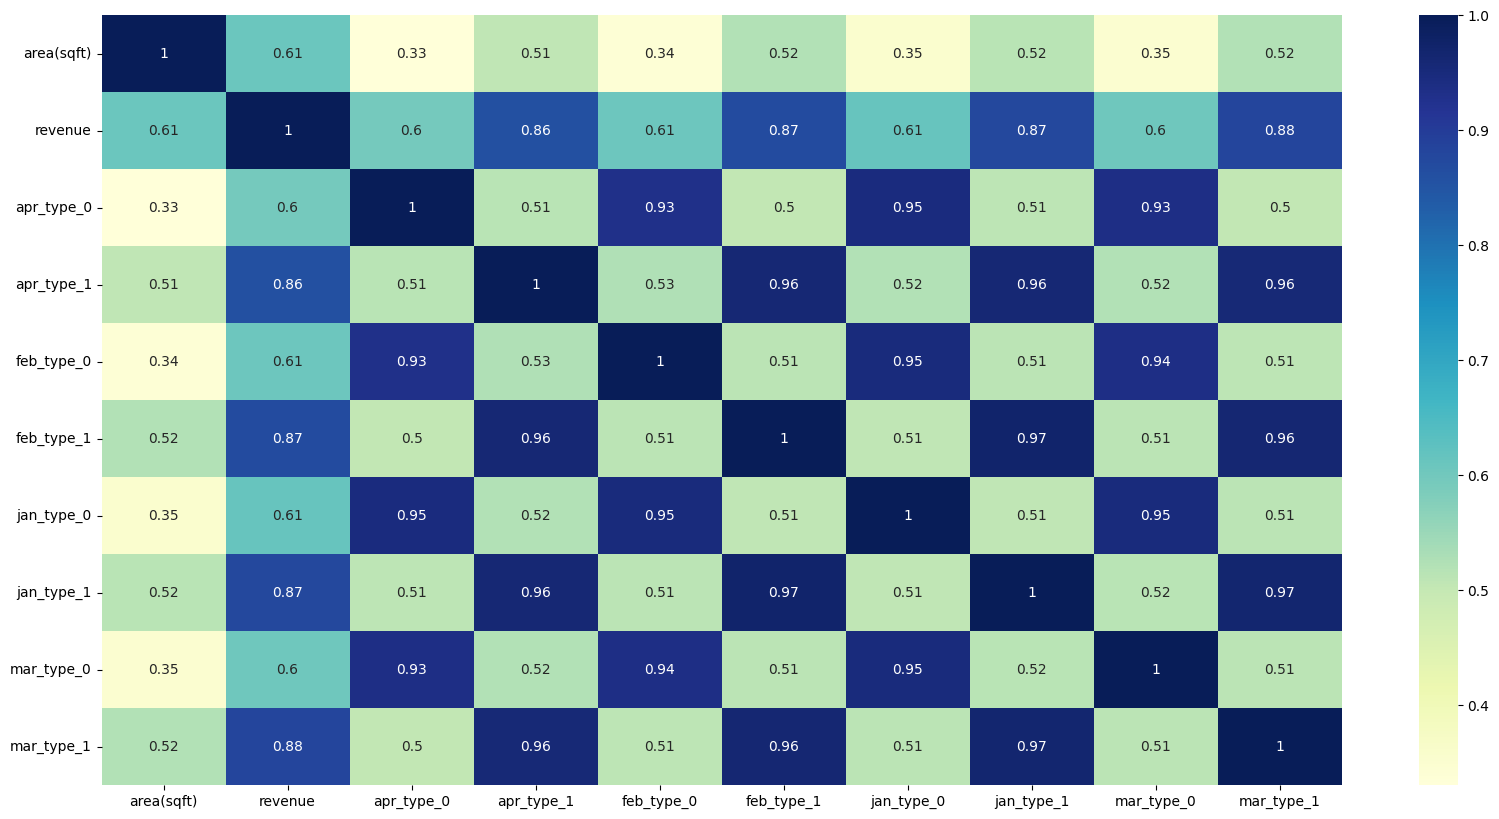

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
dataplot = sns.heatmap(merged_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

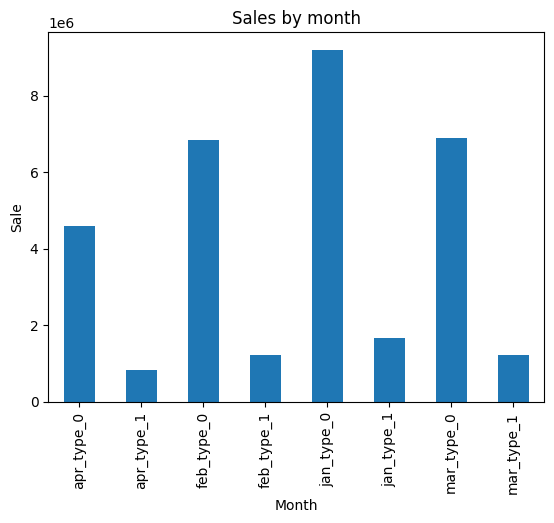

In [ ]:
sum_cols = merged_df.drop(['Outlet_ID','area(sqft)','revenue'],axis=1).sum()
sum_cols.plot(kind='bar')
plt.title('Sales by month')
plt.xlabel('Month')
plt.ylabel('Sale')
plt.show()

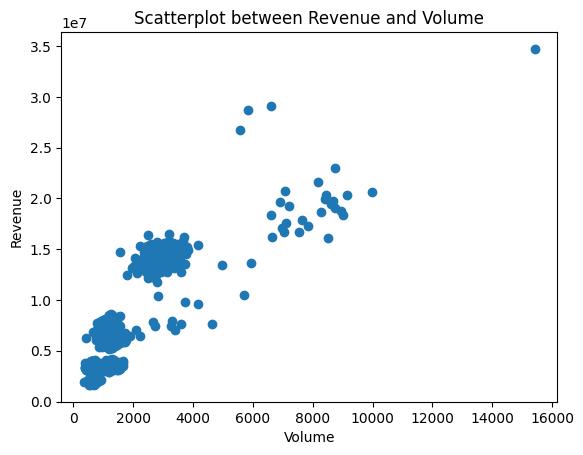

In [ ]:
revenue = merged_df['revenue']
volume = merged_df['apr_type_0']*0.2+merged_df['apr_type_1']*1.0

plt.scatter(volume, revenue)
plt.title('Scatterplot between Revenue and Volume')
plt.xlabel('Volume')
plt.ylabel('Revenue')
plt.show()

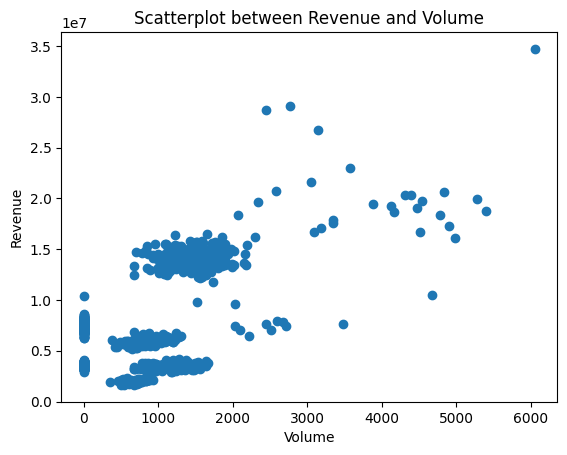

In [ ]:
revenue = merged_df['revenue']
volume = merged_df['apr_type_0']*0.2

plt.scatter(volume, revenue)
plt.title('Scatterplot between Revenue and Volume')
plt.xlabel('Volume')
plt.ylabel('Revenue')
plt.show()

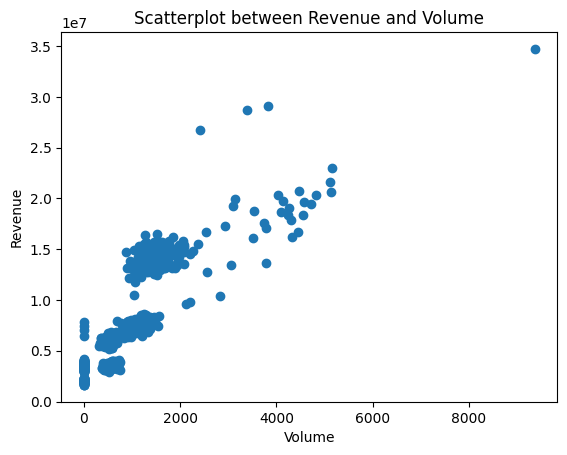

In [ ]:
revenue = merged_df['revenue']
volume = merged_df['apr_type_1']*1.0

plt.scatter(volume, revenue)
plt.title('Scatterplot between Revenue and Volume')
plt.xlabel('Volume')
plt.ylabel('Revenue')
plt.show()

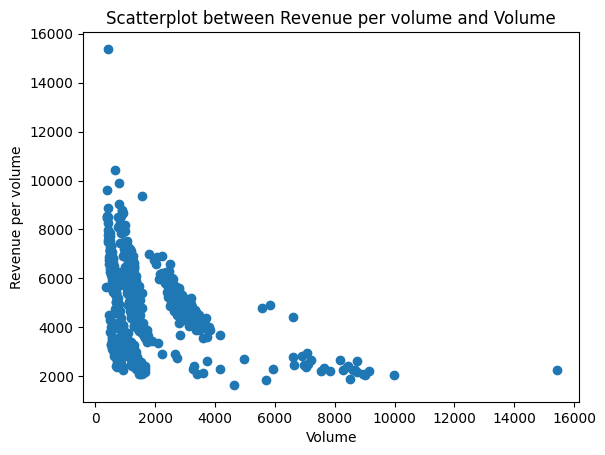

In [ ]:
revenue = merged_df['revenue']
volume = merged_df['apr_type_0']*0.2+merged_df['apr_type_1']*1.0

plt.scatter(volume, revenue/volume)
plt.title('Scatterplot between Revenue per volume and Volume')
plt.xlabel('Volume')
plt.ylabel('Revenue per volume')
plt.show()

# Clustering

In [ ]:
merged_df

,Outlet_ID,area(sqft),revenue,apr_type_0,apr_type_1,feb_type_0,feb_type_1,jan_type_0,jan_type_1,mar_type_0,mar_type_1
0,ID1772,9950,14446520,6457,1896,11481,2730,15093,2527,11225,1938
1,ID3551,9912,13455030,5350,1468,9377,1932,12622,2733,12163,2440
2,ID7758,9910,13393550,7224,1459,9327,1332,16129,3043,12854,2201
3,ID5341,9896,6848500,0,1220,0,1504,0,2130,0,1362
4,ID3289,9894,13428950,7795,1219,10299,1971,15815,2895,8423,2252
...,...,...,...,...,...,...,...,...,...,...,...
946,ID7472,264,2298000,4220,0,5670,0,7028,0,6012,0
947,ID1494,152,2035590,2538,0,5955,0,8013,0,3755,0
948,ID9777,151,1886390,2871,0,4816,0,6706,0,4524,0
949,ID2283,125,1672170,2694,0,3256,0,5971,0,4860,0


In [ ]:
merged_df['jan_vol'] = merged_df['jan_type_0']*0.2 + merged_df['jan_type_1']
merged_df['feb_vol'] = merged_df['feb_type_0']*0.2 + merged_df['feb_type_1']
merged_df['mar_vol'] = merged_df['mar_type_0']*0.2 + merged_df['mar_type_1']
merged_df['apr_vol'] = merged_df['apr_type_0']*0.2 + merged_df['apr_type_1']

New = merged_df.drop(columns=['jan_type_0', 'jan_type_1', 'feb_type_0', 'feb_type_1', 'mar_type_0', 'mar_type_1', 'apr_type_0', 'apr_type_1'])

In [ ]:
New

,Outlet_ID,area(sqft),revenue,jan_vol,feb_vol,mar_vol,apr_vol
0,ID1772,9950,14446520,5545.6,5026.2,4183.0,3187.4
1,ID3551,9912,13455030,5257.4,3807.4,4872.6,2538.0
2,ID7758,9910,13393550,6268.8,3197.4,4771.8,2903.8
3,ID5341,9896,6848500,2130.0,1504.0,1362.0,1220.0
4,ID3289,9894,13428950,6058.0,4030.8,3936.6,2778.0
...,...,...,...,...,...,...,...
946,ID7472,264,2298000,1405.6,1134.0,1202.4,844.0
947,ID1494,152,2035590,1602.6,1191.0,751.0,507.6
948,ID9777,151,1886390,1341.2,963.2,904.8,574.2
949,ID2283,125,1672170,1194.2,651.2,972.0,538.8


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
New['Outlet_ID'] = le.fit_transform(New['Outlet_ID'])
column_names = New.drop(columns=['Outlet_ID', 'area(sqft)']).columns

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(New.drop(columns=['Outlet_ID', 'area(sqft)'])), columns=column_names)

In [ ]:
scaled_data

,revenue,jan_vol,feb_vol,mar_vol,apr_vol
0,1.276813,0.658426,1.077722,0.680063,0.917320
1,1.079476,0.557015,0.506448,1.006166,0.474077
2,1.067239,0.912904,0.220530,0.958499,0.723751
3,-0.235433,-0.543448,-0.573197,-0.653948,-0.425515
4,1.074285,0.838728,0.611160,0.563544,0.637887
...,...,...,...,...,...
946,-1.141126,-0.798348,-0.746623,-0.729421,-0.682151
947,-1.193354,-0.729028,-0.719906,-0.942882,-0.911758
948,-1.223050,-0.821009,-0.826680,-0.870152,-0.866301
949,-1.265686,-0.872735,-0.972920,-0.838374,-0.890463


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(scaled_data)

cluster_assignments = kmeans.labels_

scaled_data['Cluster'] = cluster_assignments

inertia = kmeans.inertia_
silhouette_coefficient = silhouette_score(scaled_data, cluster_assignments)
db_index = davies_bouldin_score(scaled_data, cluster_assignments)
ch_index = calinski_harabasz_score(scaled_data, cluster_assignments)


print("Silhouette Coefficient:", silhouette_coefficient)
print("Davies Bouldin Score:", db_index)
print("Calinski Harabasz Score:", ch_index)
print("Inertia: ", inertia)

Silhouette Coefficient: 0.8462482892433885
Davies Bouldin Score: 0.31908899483040265
Calinski Harabasz Score: 8859.480697425412
Inertia:  148.2487986666959


In [ ]:
New['Cluster'] = scaled_data['Cluster']
New

,Outlet_ID,area(sqft),revenue,jan_vol,feb_vol,mar_vol,apr_vol,Cluster
0,83,9950,14446520,5545.6,5026.2,4183.0,3187.4,6
1,251,9912,13455030,5257.4,3807.4,4872.6,2538.0,1
2,729,9910,13393550,6268.8,3197.4,4771.8,2903.8,1
3,447,9896,6848500,2130.0,1504.0,1362.0,1220.0,0
4,231,9894,13428950,6058.0,4030.8,3936.6,2778.0,1
...,...,...,...,...,...,...,...,...
946,701,264,2298000,1405.6,1134.0,1202.4,844.0,3
947,52,152,2035590,1602.6,1191.0,751.0,507.6,3
948,928,151,1886390,1341.2,963.2,904.8,574.2,3
949,139,125,1672170,1194.2,651.2,972.0,538.8,3


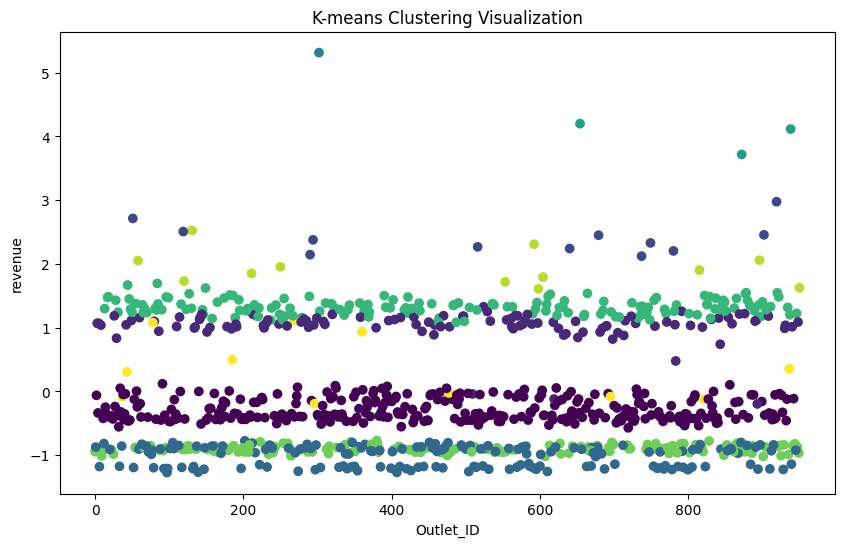

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(New['Outlet_ID'], scaled_data['revenue'], c=scaled_data['Cluster'], cmap='viridis')
plt.xlabel('Outlet_ID')
plt.ylabel('revenue')
plt.title('K-means Clustering Visualization')
plt.show()

In [ ]:
New['volume'] = New['jan_vol'] + New['feb_vol'] + New['mar_vol'] + New['apr_vol']
final = New.drop(columns=['jan_vol','feb_vol','mar_vol','apr_vol'])
final

,Outlet_ID,area(sqft),revenue,Cluster,volume
0,83,9950,14446520,6,17942.2
1,251,9912,13455030,1,16475.4
2,729,9910,13393550,1,17141.8
3,447,9896,6848500,0,6216.0
4,231,9894,13428950,1,16803.4
...,...,...,...,...,...
946,701,264,2298000,3,4586.0
947,52,152,2035590,3,4052.2
948,928,151,1886390,3,3783.4
949,139,125,1672170,3,3356.2


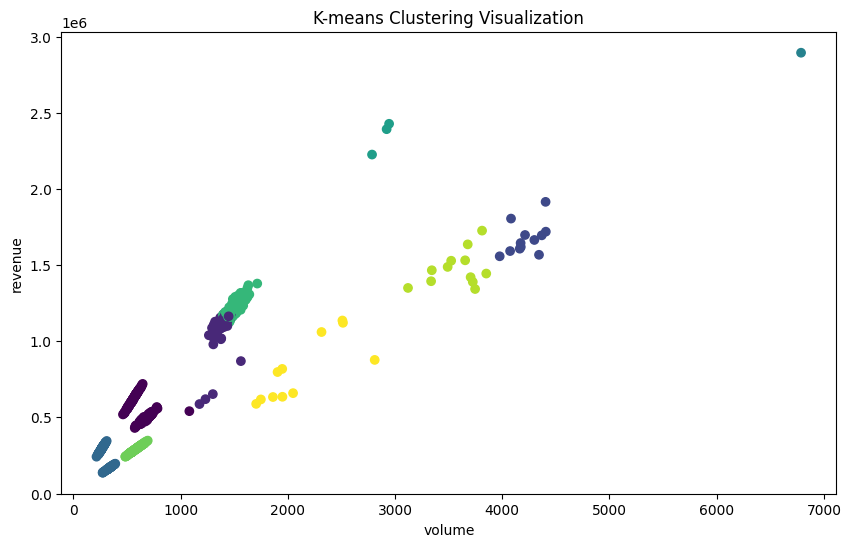

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(final['volume']/12, final['revenue']/12, c=final['Cluster'], cmap='viridis')
plt.xlabel('volume')
plt.ylabel('revenue')
plt.title('K-means Clustering Visualization')
plt.show()

In [ ]:
means = final.groupby('Cluster')[['volume', 'revenue']].mean()
means

,volume,revenue
Cluster,,
0,7583.826059,6.609626e+06
1,16561.278947,1.322011e+07
2,50672.733333,2.008531e+07
3,3547.786982,2.918440e+06
4,81434.000000,3.473213e+07
5,34611.200000,2.818244e+07
6,18127.074534,1.468385e+07
7,7005.295652,3.503442e+06
8,42988.166667,1.771665e+07


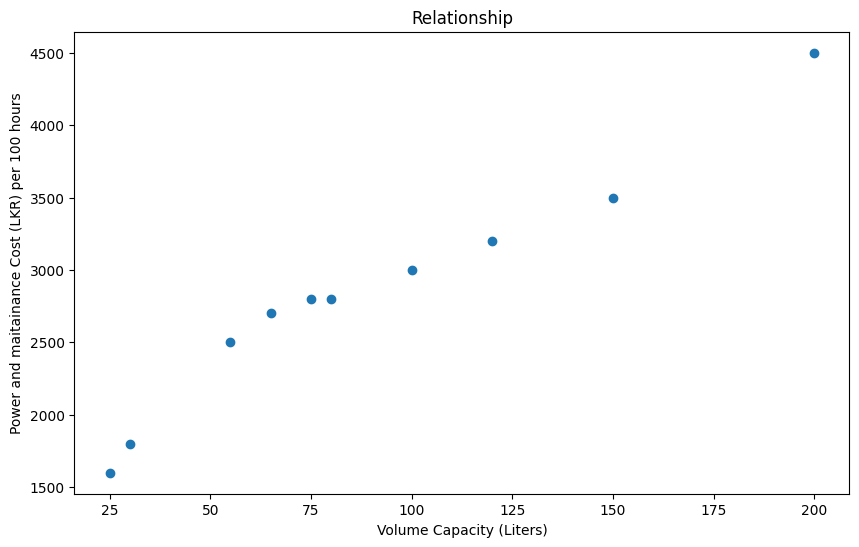

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Volume Capacity (Liters)'], df1['Power and maitainance Cost (LKR) per 100 hours'])
plt.xlabel('Volume Capacity (Liters)')
plt.ylabel('Power and maitainance Cost (LKR) per 100 hours')
plt.title('Relationship')
plt.show()

In [ ]:
means = final.groupby('Cluster')[['volume', 'revenue']].mean()
means

,volume,revenue
Cluster,,
0,7583.826059,6.609626e+06
1,16561.278947,1.322011e+07
2,50672.733333,2.008531e+07
3,3547.786982,2.918440e+06
4,81434.000000,3.473213e+07
5,34611.200000,2.818244e+07
6,18127.074534,1.468385e+07
7,7005.295652,3.503442e+06
8,42988.166667,1.771665e+07


In [ ]:
count = final.groupby('Cluster')[['volume', 'revenue']].size().reset_index()
count

,Cluster,0
0,0,307
1,1,114
2,2,12
3,3,169
4,4,1
5,5,3
6,6,161
7,7,161
8,8,12
9,9,11


In [ ]:
df1['Total_cost'] = (df1['Power and maitainance Cost (LKR) per 100 hours']/100)*24*30*4
df1

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours,Total_cost
0,ChillMaster,M001,55,2500,72000.0
1,FreezeZone,M002,75,2800,80640.0
2,CoolTech,M003,120,3200,92160.0
3,mini CoolTech,M004,30,1800,51840.0
4,IceBlast Pro,M005,150,3500,100800.0
5,IceBlast,M006,65,2700,77760.0
6,FreezeTech,M007,100,3000,86400.0
7,FreezeTech 3.0,M008,25,1600,46080.0
8,ChillTech,M009,80,2800,80640.0
9,IceTech,M010,200,4500,129600.0


In [ ]:
for i in means['revenue']/12:
  arr=[]
  for j in df1['Total_cost']:
    ROI=i/j
    arr.append(ROI)
  maxi = max(arr)
  print(i,maxi, arr.index(maxi))

550802.1851248642 11.95317242024445 7
1101675.4678362573 23.90788775686322 7
1673775.5555555557 36.323254243827165 7
243203.3431952663 5.277850329758383 7
2894344.1666666665 62.81128833912037 7
2348536.6666666665 50.966507523148145 7
1223654.0890269151 26.554993251452153 7
291953.4886128364 6.335796193854956 7
1476387.1527777778 32.03965175298997 7
813128.1060606061 17.646009246106903 7


In [ ]:
for i in (means['volume']/12):
  temp=[]
  for j in df1['Volume Capacity (Liters)']:
    ISR=(i/j)-1
    if ISR>=0:
      temp.append(ISR)
  if len(temp)>0:
    mini = max(temp)
    print(temp.index(mini), mini, i)

7 24.279420195439737 631.9855048859935
7 54.20426315789474 1380.1065789473685
7 167.90911111111112 4222.727777777778
7 10.82595660749507 295.64891518737676
7 270.44666666666666 6786.166666666667
7 114.37066666666665 2884.2666666666664
7 59.4235817805383 1510.5895445134574
7 22.350985507246378 583.7746376811594
7 142.2938888888889 3582.347222222222
7 83.8 2120.0
